<a href="https://colab.research.google.com/github/celiamarrakchi/modeles_de_classification/blob/main/exercice_classification(prediction_heart_attack).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#deselectionner tout ctrl+:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

I- Upload Dataset

In [2]:
data = pd.read_csv('Heart Attack Analysis & Prediction Dataset.csv')


In [3]:
data.shape


(303, 14)

In [4]:
data.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


Data modeling

knn

Divide data into training data and test data.

In [35]:
# Separate explanatory variables X and class y
X =  data.drop(['output'], axis=1)
y = data['output']
# Split data (80% Learning and 20% Testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Centering-Reduction of data (Standardization)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Learning phase: Applying the KNN model on training data

Text(0, 0.5, 'Erreur')

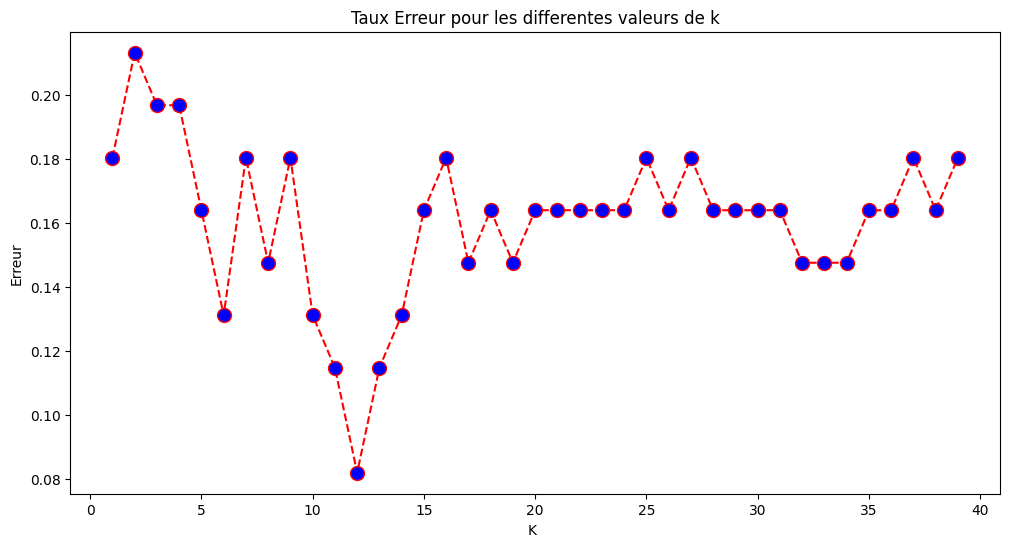

In [7]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# For each iteration, the average error for the predicted values of the test set is calculated and saved in the Error list.
# Test k from 1 to 40 and Manhattan distance
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

Hyperparameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,90))
# p=1 manhattan_distance (can be used for categorical values)/
# p=2 euclidean_distance(cannot be used for categorical values)
p=[1,2]
# Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
# Create new KNN object
knn_2 = KNeighborsClassifier()
# Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# cv: number of folds of the cross validation

# Fit the model
best_model = clf.fit(X_train, y_train)
# Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 40


In [9]:
# Display the hyperparameters that give the best performance
best_parameters = clf.best_params_
print(best_parameters)

{'n_neighbors': 40, 'p': 1}


In [10]:
# Evaluate the model
best_result = clf.best_score_   #accuracy
print(best_result)

0.8516666666666668


In [21]:
# Test the model on test dataset
#suivant le graph le meilleur k est 12
knn = KNeighborsClassifier(12,p=1)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [22]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.92


In [23]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[23  4]
 [ 1 33]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))
#weighted avg : weighted average by data size

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        34

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



Conclusion: le grid ne m a pas donné la meilleur solution  d apres le graph x=k et y=erreur le meilleur nombre de voisins (k) pour minimiser l erreur est 12 alors que le grid m a donné 40
Les resultats avec les parametres k=12 et p=1 donne le meilleur resultat

logistic_regression

Create and train the Logistic Regression model with different regularization parameters (C).

In [31]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create a list of regularization parameter values
C_values = [0.01, 0.1, 1, 10, 100]

# Create an empty dictionary to store the results
results = {}

# Train Logistic Regression models with different C values
for C in C_values:
    lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=C, max_iter=1000)
    )
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C] = {
        'model': lr_model,
        'accuracy': accuracy
    }


Print the results of the classification.

In [32]:
# Print the results of the classification
print("Results of Logistic Regression Classification:")
for C, result in results.items():
    print(f"C = {C}, Accuracy: {result['accuracy']:.4f}")

Results of Logistic Regression Classification:
C = 0.01, Accuracy: 0.8197
C = 0.1, Accuracy: 0.8525
C = 1, Accuracy: 0.8525
C = 10, Accuracy: 0.8525
C = 100, Accuracy: 0.8525


In [33]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[21  6]
 [ 3 31]]

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Visualize the accuracy vs regularization parameter (C) for comparison.

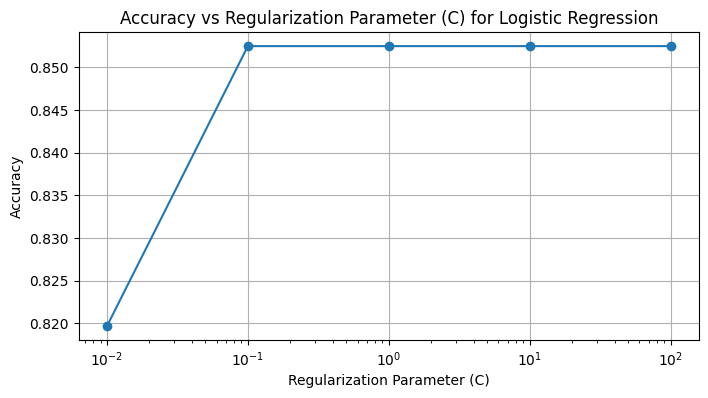

In [28]:
# Visualize the accuracy vs regularization parameter (C)
accuracies = [result['accuracy'] for C, result in results.items()]

plt.figure(figsize=(8, 4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter (C) for Logistic Regression')
plt.grid(True)
plt.show()

avec grid

In [30]:
# Définition de la pipeline : StandardScaler suivi de LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Définition des valeurs de C à tester
param_grid = {
    'logreg__C': [0.001,0.01, 0.1, 1, 10, 100,1000]  # Liste des valeurs possibles pour C
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # Validation croisée à 5 folds
    scoring='accuracy',  # Métrique à optimiser
    verbose=2,
    n_jobs=-1  # Utilisation de tous les cœurs disponibles
)

# Recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# Affichage des résultats
print("Meilleur hyperparamètre C :", grid_search.best_params_['logreg__C'])
print("Meilleure précision sur le CV :", grid_search.best_score_)

# Évaluation sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Meilleur hyperparamètre C : 0.01
Meilleure précision sur le CV : 0.8266156462585034

Confusion Matrix:
[[18  9]
 [ 2 32]]

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.78      0.94      0.85        34

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61



Conclusion: le grid ne donne pas toujours le meilleur resultat en utulisant le graph x=c y=accurancy la meilleur valeur du parametre c est 0.1 contrairement au grid qui m a donné la valeur 0.01.
Le meilleur resultat avec LR et avec c=0.1

SVM

In [34]:
print(data.groupby('output').size())

output
0    138
1    165
dtype: int64


In [36]:
#Import SVC
from sklearn.svm import SVC

Linear kernel

In [37]:

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.88      0.81      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



Polynomial kernel

In [38]:
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        20
           1       0.85      0.71      0.77        41

    accuracy                           0.72        61
   macro avg       0.70      0.73      0.71        61
weighted avg       0.76      0.72      0.73        61



Sigmoid kernel

In [39]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.56      0.72        61

    accuracy                           0.56        61
   macro avg       0.50      0.28      0.36        61
weighted avg       1.00      0.56      0.72        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gaussian RBF model

In [40]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.48      0.72      0.58        18
           1       0.85      0.67      0.75        43

    accuracy                           0.69        61
   macro avg       0.67      0.70      0.67        61
weighted avg       0.74      0.69      0.70        61



Results comparison

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linear','Support Vector Machines polynomial',
              'Support Vector Machines sigmoïd'],
    'Score': [s1,s2, s3,
              s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Support Vector Machines Linear,0.819672
2,Support Vector Machines polynomial,0.721311
0,Support Vector Machines RBF,0.688525
3,Support Vector Machines sigmoïd,0.557377


ROC curve

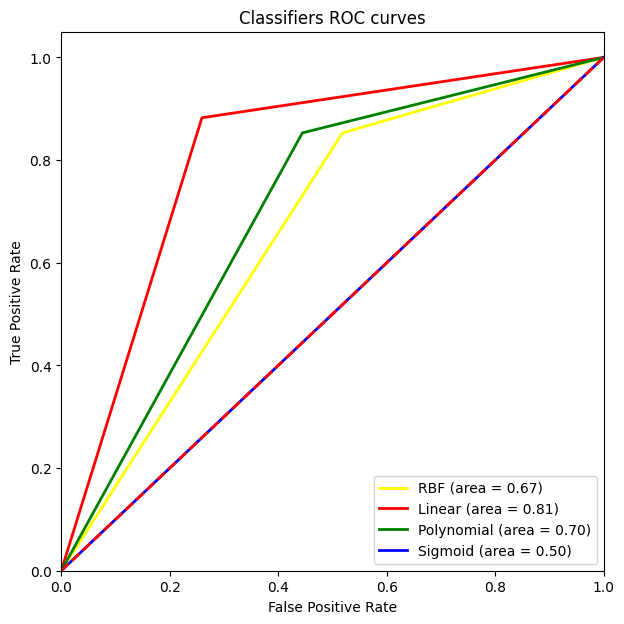

In [42]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4)
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7))
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='RBF (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Linear (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Polynomial (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='blue', lw=2, label='Sigmoid (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

With GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear','poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True)

# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly']})

In [44]:
print("Best parameters with GridSeachCV")
print(grid.best_params_)

Best parameters with GridSeachCV
{'C': 0.1, 'kernel': 'linear'}


In [53]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
svm = SVC(C=0.1,kernel="linear", gamma=0.1)
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))


Confusion Matrix:
[[20  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.91      0.82      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



In [52]:
print('Accuracy of svm classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of svm classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of svm classifier on training set: 0.83
Accuracy of svm classifier on test set: 0.84
